In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, multivariate_normal
from numpy.linalg import inv, cholesky

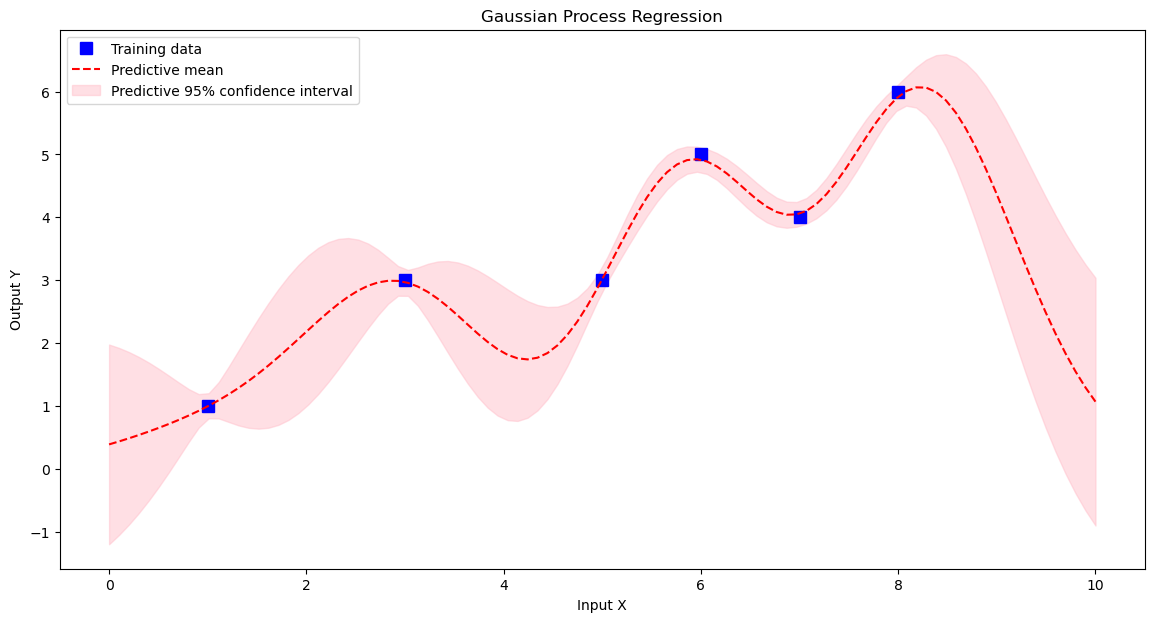

In [97]:
def k(x1,x2, sigma_f = 1, l = 1):
    return sigma_f**2 * np.exp(-0.5/l**2 * (x1.reshape(-1,1) - x2.reshape(1,-1))**2)

# example data
X_train = np.array([1, 3, 5, 6, 7, 8])
y_train = np.array([1, 3, 3, 5, 4, 6])
X_test = np.linspace(0, 10, 100).reshape(-1,1)

def GP_regression(X_train, y_train, X_test, l=1, sigma_f=1, sigma_n=0.1):
    n = len(X_train)
    K = k(X_train,X_train, sigma_f, l) + sigma_n**2 * np.eye(n)
    L = np.linalg.cholesky(K)

    m = len(X_test)
    K_s = k(X_train, X_test, sigma_f, l)
    v = np.linalg.solve(L, K_s)
    mu = np.dot(v.T, np.linalg.solve(L, y_train))

    K_ss = k(X_test, X_test, sigma_f, l)
    s2 = np.diag(K_ss) - np.sum(v**2, axis=0)
    stdv = np.sqrt(s2)

    return mu, stdv

mu, stdv = GP_regression(X_train, y_train, X_test)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(X_train, y_train, 'bs', markersize=8, label='Training data')
plt.plot(X_test, mu, 'r--', label='Predictive mean')
plt.fill_between(X_test.flat, mu-2*stdv, mu+2*stdv, color='pink', alpha=0.5, label='Predictive 95% confidence interval')
plt.title('Gaussian Process Regression')
plt.xlabel('Input X')
plt.ylabel('Output Y')
plt.legend()
plt.show()


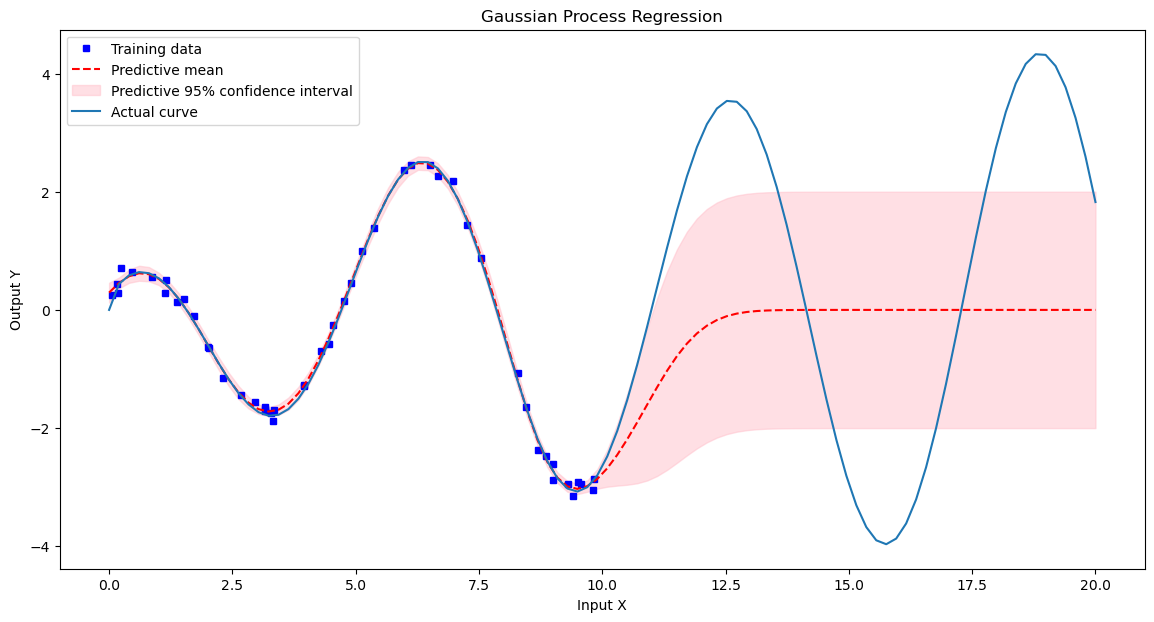

In [96]:
X_test = np.linspace(0, 20, 100) # xt for test (like x* in the textbook)
y_actual = abs(X_test)**0.5 * np.cos(X_test)

X_train = np.random.uniform(0, 10, size=50)
sigma_n = 0.1
eps = np.random.normal(0, sigma_n, size=50)
y_train = abs(X_train)**0.5 * np.cos(X_train) + eps

mu, stdv = GP_regression(X_train, y_train, X_test, sigma_n=sigma_n)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(X_train, y_train, 'bs', markersize=4, label='Training data')
plt.plot(X_test, mu, 'r--', label='Predictive mean')
plt.fill_between(X_test.flat, mu-2*stdv, mu+2*stdv, color='pink', alpha=0.5, label='Predictive 95% confidence interval')
plt.plot(X_test, y_actual, label="Actual curve")
plt.title('Gaussian Process Regression')
plt.xlabel('Input X')
plt.ylabel('Output Y')
plt.legend()
plt.show()